In [1]:
import numpy as np 
import pandas as pd 
import warnings 
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import lime
import lime.lime_tabular
import shap


In [2]:
# load the datasets into dataframe 
import pandas as pd
df = pd.read_csv("diabetes.csv")  
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#Preview the dataseat (Displaying the top 15 rows of the data set)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
#(Displaying the top 15 rows of the data set)
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.shape

(768, 9)

In [6]:
df.size

6912

In [7]:
df.empty

False

In [8]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
# This is use to check for duplicate rows in a DataFrame, and sum() is used to count how many of those duplicate rows exist.
df.duplicated().sum()

0

In [13]:
# Check the proportion of zeros in each column
zeros_proportion = (df == 0).sum() / df.size

print("Proportion of zeros in each column:")
print(zeros_proportion)

Proportion of zeros in each column:
Pregnancies                 0.016059
Glucose                     0.000723
BloodPressure               0.005064
SkinThickness               0.032841
Insulin                     0.054109
BMI                         0.001591
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.072338
dtype: float64


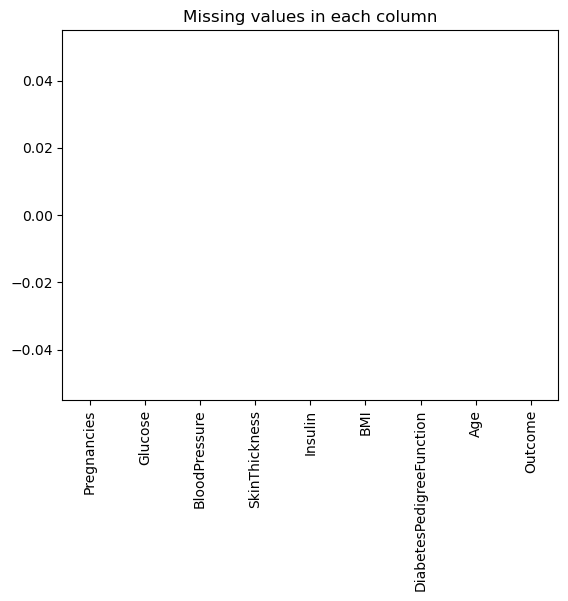

In [14]:
# Check for missing data and plot it in a bar chart
df.isnull().sum().plot(kind="bar", color="red", title="Missing values in each column")

# Show the plot
plt.show()

In [15]:
# Check the number of missing values and zeros
#convert it  to null and fill it with mean, mode or meadian
zeros_count = (df == 0).sum().sum()
missing_count = df.isna().sum().sum()

print(f"Number of zeros: {zeros_count}")
print(f"Number of missing values: {missing_count}")

Number of zeros: 1263
Number of missing values: 0


In [16]:
# List of columns to exclude from replacement (in this case, 'Outcome')
exclude_columns = ['Outcome']

# Replace all occurrences of 0 with NaN in the entire DataFrame except for 'Outcome'
df.loc[:, df.columns.difference(exclude_columns)] = df.loc[:, df.columns.difference(exclude_columns)].replace(0, np.nan)

# Check the result (first 5 rows) to verify that zeros have been replaced by NaN
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


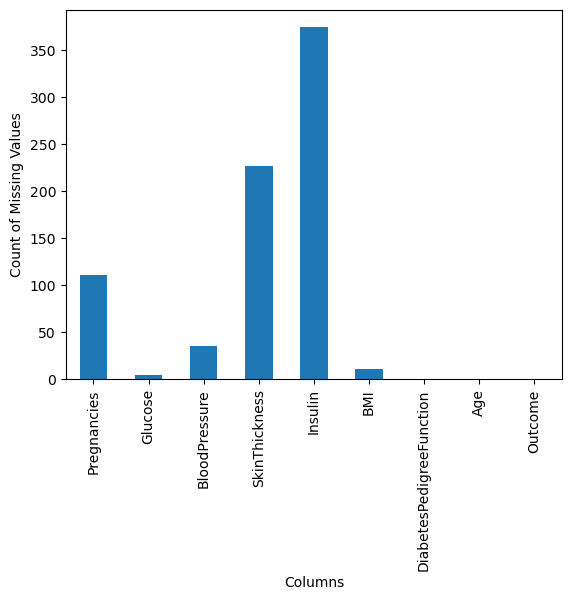

In [17]:
# Plot the count of missing values in each column
missing_values = df.isnull().sum().plot(kind="bar")

# Plot the missing values as a bar chart
missing_values.plot(kind="bar", color="red", title="Missing Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.show()

In [18]:
#This Checks for missing values on each column
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [19]:
# Function to fill missing values with mode for all columns except 'Outcome'
def impute_missing_values_with_mode(df):
    for column in df.columns:
        if column != 'Outcome':  # Skip the 'Outcome' column
            # Get the mode for the column (mode() returns a Series, we take the first value with [0])
            mode_value = df[column].mode()[0]  
            
            # If the column has missing values, fill them with the mode
            if df[column].isnull().sum() > 0:  # Only fill if there are missing values
                df[column].fillna(mode_value, inplace=True)  # Fill missing values with mode

# Apply the function to fill missing values
impute_missing_values_with_mode(df)

# Check the result (first 5 rows) to verify that missing values are filled with the mode
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,105.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,105.0,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,105.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,1.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [20]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

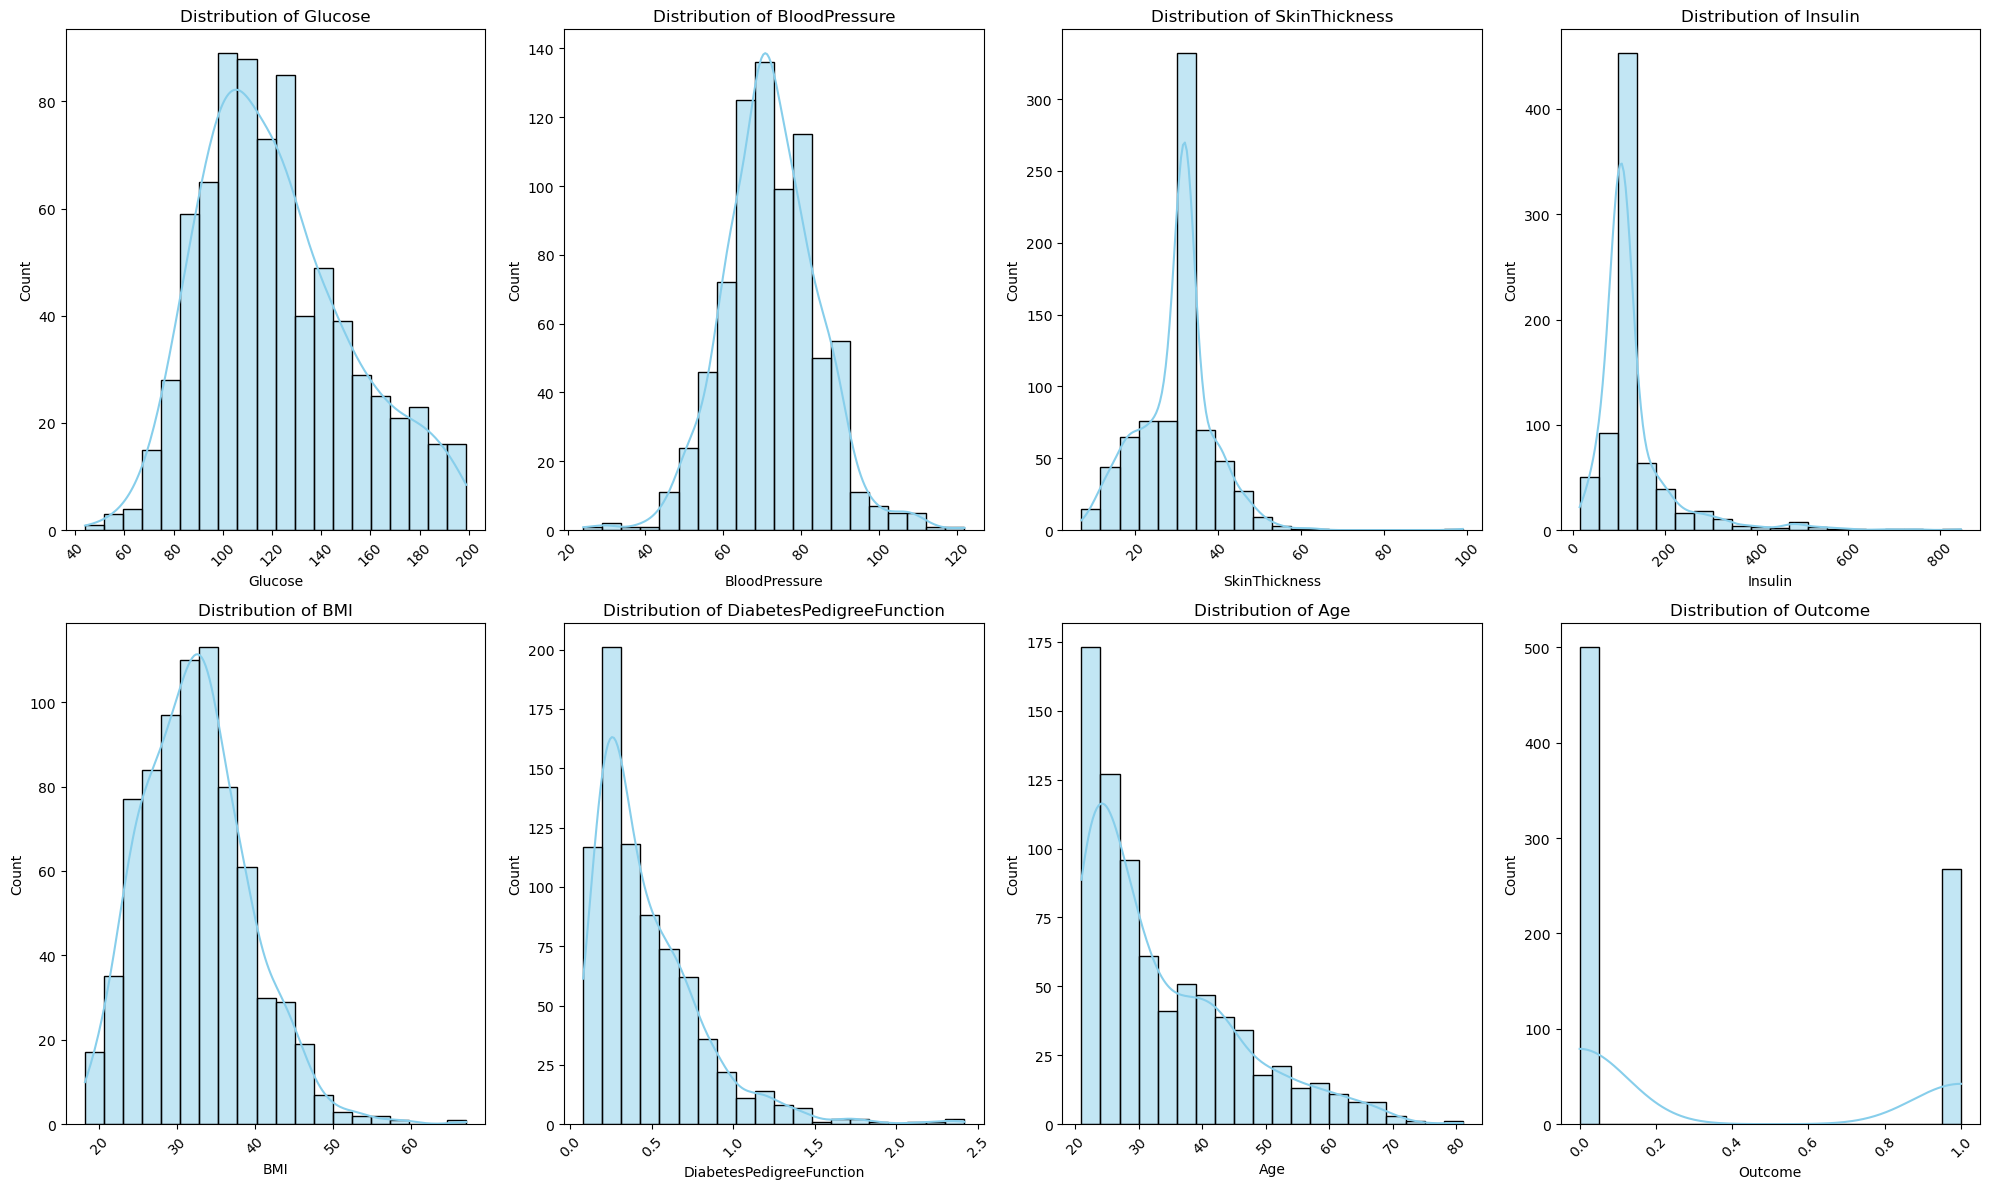

In [22]:
# Define the columns you want to plot and their positions (as in your provided structure)
plot_params = [
    ("Glucose", (0, 0)),
    ("BloodPressure", (0, 1)),
    ("SkinThickness", (0, 2)),
    ("Insulin", (0, 3)),
    ("BMI", (1, 0)),
    ("DiabetesPedigreeFunction", (1, 1)),
    ("Age", (1, 2)),
    ("Outcome", (1, 3))  # 'Outcome' is now treated the same as other columns
]

# Create subplots with a 2x4 grid (adjusted for 8 features)
fig, ax = plt.subplots(2, 4, figsize=(20, 12))

# Loop through plot_params to create the plots
for col, position in plot_params:
    # Use histograms with kde for all columns, including 'Outcome'
    sns.histplot(df[col], kde=True, bins=20, color='skyblue', ax=ax[position])

    # Set the title and rotate x-axis labels
    ax[position].set_title(f'Distribution of {col}')
    ax[position].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [24]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,105.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,105.0,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,105.0,23.3,0.672,32,1


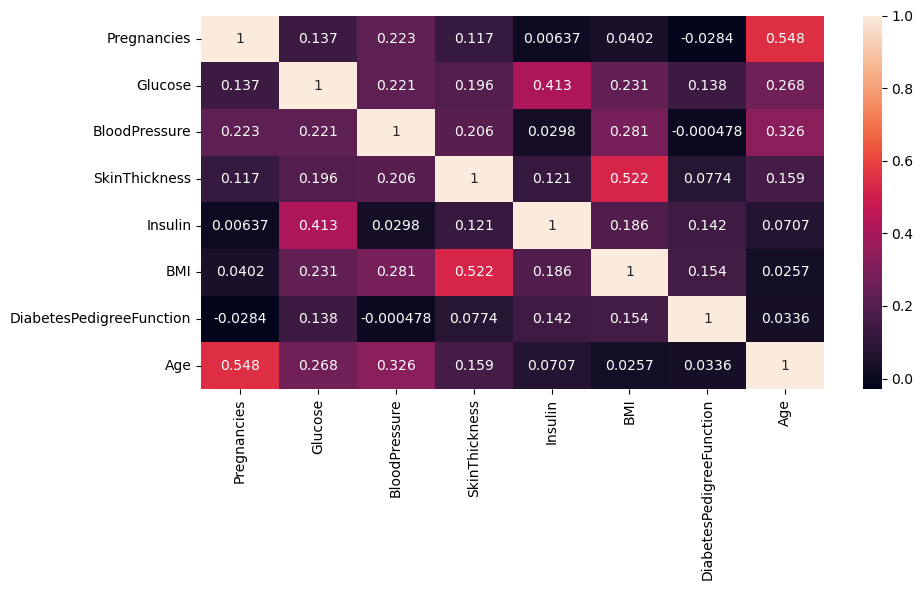

In [25]:
# A correlation matrix is used to evaluate the relationship amongst the variables of a dataset.
#The correlation matrix contains correlation coefficients
Diabetes_copy= df.drop(df.columns[8], axis=1)
corr_matrix = Diabetes_copy.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, 
    robust=False,
    annot=True,
    fmt='.3g',
    )
plt.tight_layout() 
plt.show()

In [26]:
# Add a new column 'AgeCategory':
# Assign 1 if Age is greater than 30, otherwise assign 0
df['AgeCategory'] = df['Age'].apply(lambda age: 1 if age >= 30 else 0)

# Display the first few rows with 'Age' and 'AgeCategory'
print(df[['Age', 'AgeCategory']].head(20))


    Age  AgeCategory
0    50            1
1    31            1
2    32            1
3    21            0
4    33            1
5    30            1
6    26            0
7    29            0
8    53            1
9    54            1
10   30            1
11   34            1
12   57            1
13   59            1
14   51            1
15   32            1
16   31            1
17   31            1
18   33            1
19   32            1


In [27]:
df = df.drop(columns=['Age'])

# Display the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,AgeCategory
0,6.0,148.0,72.0,35.0,105.0,33.6,0.627,1,1
1,1.0,85.0,66.0,29.0,105.0,26.6,0.351,0,1
2,8.0,183.0,64.0,32.0,105.0,23.3,0.672,1,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,0,0
4,1.0,137.0,40.0,35.0,168.0,43.1,2.288,1,1


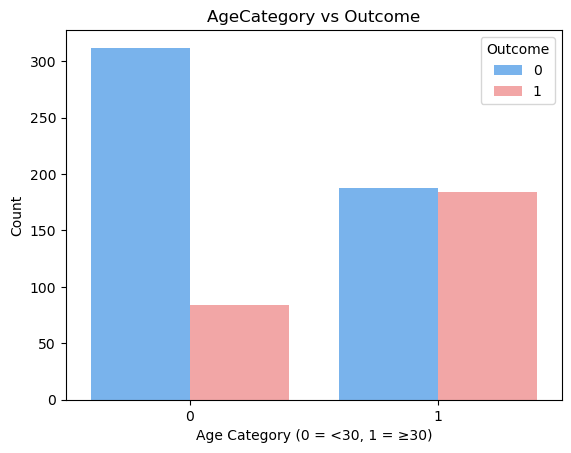

In [28]:
sns.countplot(x='AgeCategory', hue='Outcome', data=df, palette=['#66B3FF', '#FF9999'])
plt.title('AgeCategory vs Outcome')
plt.xlabel('Age Category (0 = <30, 1 = ≥30)')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()


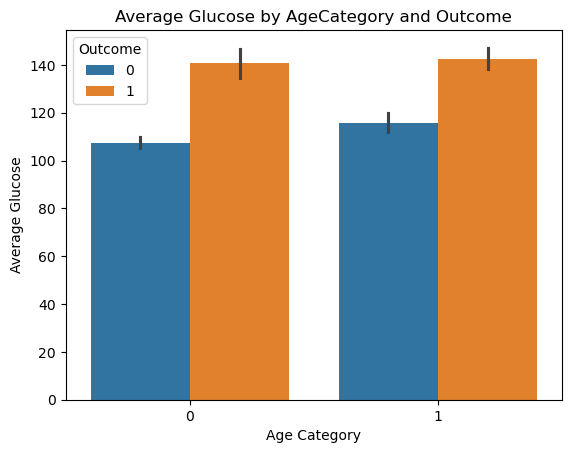

In [29]:
sns.barplot(x='AgeCategory', y='Glucose', hue='Outcome', data=df)
plt.title('Average Glucose by AgeCategory and Outcome')
plt.xlabel('Age Category')
plt.ylabel('Average Glucose')
plt.legend(title='Outcome')
plt.show()


In [30]:
# Assuming 'y_train' is your target variable (target labels)
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

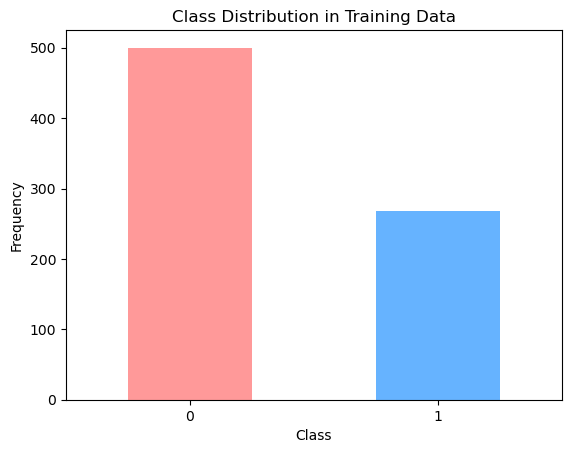

In [31]:
df.Outcome.value_counts().plot(kind='bar', color=['#FF9999','#66B3FF'])
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [32]:
class_counts = df['Outcome'].value_counts(normalize=True)
print(class_counts)


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [33]:
# 📌 Select your features and target variable
features = ['Glucose', 'BMI', 'BloodPressure', 'AgeCategory', 'Pregnancies', 
            'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin']
X = df[features]  # Feature data
y = df['Outcome']  # Target variable

# 🔀 Split into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 📏 Scale the features using StandardScaler (important for SVMs)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform test data (to prevent data leakage)

# 🧠 Train the SVM model (with balanced class weights to handle imbalanced data)
from sklearn.svm import SVC
svc = SVC(class_weight='balanced', probability=True, kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)  # Fit the model on scaled training data

# 📊 Make predictions and calculate probabilities
y_pred = svc.predict(X_test_scaled)  # Predicted class labels
y_proba = svc.decision_function(X_test_scaled)  # Raw decision function values (for AUC)

# 🧾 Evaluate the model

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score
from sklearn.metrics import roc_auc_score
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[73 27]
 [13 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       100
           1       0.60      0.76      0.67        54

    accuracy                           0.74       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.74      0.75       154


ROC AUC Score: 0.8103703703703704


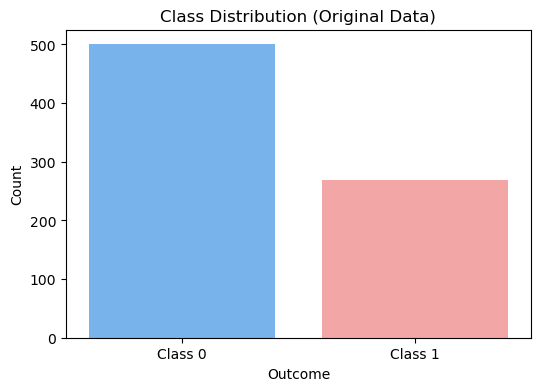

In [34]:
# Bar plot for original outcome distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, palette=['#66B3FF', '#FF9999'])
plt.title('Class Distribution (Original Data)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.show()


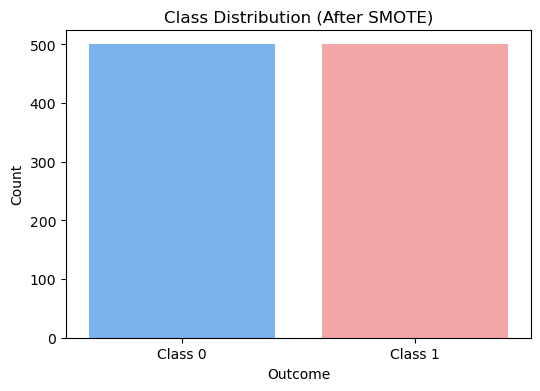

In [35]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert to DataFrame for visualization
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Outcome'] = y_resampled

# Bar plot for balanced outcome distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=resampled_df, palette=['#66B3FF', '#FF9999'])
plt.title('Class Distribution (After SMOTE)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.show()


In [36]:
# ✅ Split resampled data
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ✅ Scale features
scaler = StandardScaler()
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_test_sm_scaled = scaler.transform(X_test_sm)

# ✅ Train SVC (NO NEED for class_weight now, because data is balanced)
svc_sm = SVC(probability=True, kernel='rbf', random_state=42)
svc_sm.fit(X_train_sm_scaled, y_train_sm)

# ✅ Predict & Evaluate
y_pred_sm = svc_sm.predict(X_test_sm_scaled)
y_proba_sm = svc_sm.decision_function(X_test_sm_scaled)

print("Confusion Matrix (After SMOTE):")
print(confusion_matrix(y_test_sm, y_pred_sm))

print("\nClassification Report (After SMOTE):")
print(classification_report(y_test_sm, y_pred_sm))

print("\nROC AUC Score (After SMOTE):", roc_auc_score(y_test_sm, y_proba_sm))


Confusion Matrix (After SMOTE):
[[71 28]
 [15 86]]

Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0       0.83      0.72      0.77        99
           1       0.75      0.85      0.80       101

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200


ROC AUC Score (After SMOTE): 0.8235823582358236


In [37]:
# Create an SVM model with a linear kernel
model = SVC(kernel="linear",
            probability=True
           ).fit(X_train, y_train)  

In [38]:
Y_predict=model.predict(X_test)

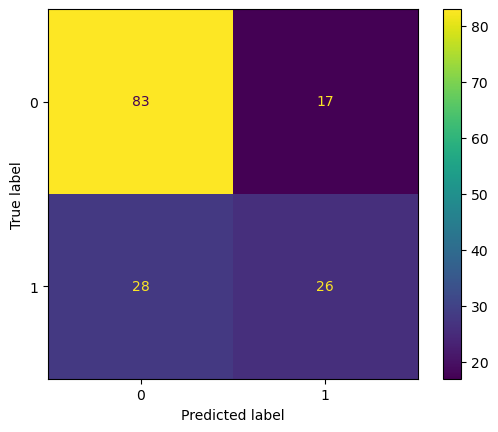

In [39]:
cm = confusion_matrix(y_test, Y_predict) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [40]:
TN,FP, FN, TP= cm.ravel()

In [41]:
# Calculate the accuracy, precision and recall
calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
calculated_F1=2*((calculated_precision * calculated_recall)/(calculated_precision + calculated_recall))

print(f"Calculated accuracy =  {calculated_accuracy*100 :.2f}%")
print(f"Calculated precision = {calculated_precision *100 :.2f}%")
print(f"Calculated recall = {calculated_recall *100 :.2f}%")
print(f"Calculated F1 =  {calculated_F1*100 :.2f}%")

Calculated accuracy =  70.78%
Calculated precision = 60.47%
Calculated recall = 48.15%
Calculated F1 =  53.61%


In [42]:
#Evaluate using the training data
train_predict=model.predict(X_train)
print("Accuracy on training data: ", accuracy_score(y_train, train_predict))
print("Precision on training data:", precision_score(y_train, train_predict))
print("Recall on training data:", recall_score(y_train, train_predict))

Accuracy on training data:  0.7866449511400652
Precision on training data: 0.7643312101910829
Recall on training data: 0.5607476635514018


In [43]:
#Evaluate using the testing data
test_predict=model.predict(X_test)
print("Accuracy on testing data: ", accuracy_score(y_test, test_predict))
print("Precision on testing data:", precision_score(y_test, test_predict))
print("Recall on testing data: ", recall_score(y_test, test_predict))

Accuracy on testing data:  0.7077922077922078
Precision on testing data: 0.6046511627906976
Recall on testing data:  0.48148148148148145


In [44]:
# Get the distribution of AgeCategory from X_test (since AgeCategory is a feature)
ageCategory_dist = X_test['AgeCategory'].value_counts()
print(ageCategory_dist)


AgeCategory
0    85
1    69
Name: count, dtype: int64


In [45]:
# Get indices for AgeCategory "Above 30" (1) and "Below 30" (0) in the test data
above_30_indices = X_test[X_test['AgeCategory'] == 1].index
below_30_indices = X_test[X_test['AgeCategory'] == 0].index

# Print the indices for both groups
print("Indices for AgeCategory Above 30 (1):", above_30_indices)
print("Indices for AgeCategory Below 30 (0):", below_30_indices)


Indices for AgeCategory Above 30 (1): Index([ 44, 672, 630, 387, 408, 116, 660, 260, 533, 140,  13,  17, 245, 517,
        62, 480,  64, 345, 745, 596, 264, 560, 558, 484, 756, 712, 355, 440,
       724, 332, 743, 351, 618, 243, 187, 496, 304,  82, 563, 722,  24, 215,
        42, 402,  88, 436, 570, 300, 489, 330, 185, 584, 164, 309, 763, 310,
       740, 674, 238, 417, 424, 212, 734, 635, 537, 298, 115,  86, 425],
      dtype='int64')
Indices for AgeCategory Below 30 (0): Index([700,  81, 389, 163, 335, 471,  78, 307, 392, 678, 742, 629,   3, 158,
        83, 437, 153, 469, 124, 305, 767, 746, 279, 380, 276, 501, 415, 535,
       428,  89, 531, 532, 713, 311, 494, 235, 650, 418, 410, 419, 527, 407,
       190, 441, 430, 698, 513, 199, 112, 162, 366, 486, 399, 488, 615, 481,
       139, 736, 445, 447, 144, 127, 347, 247,   6, 258, 198, 699, 205, 543,
       554, 244,  94, 697, 679, 589, 421, 268,  87,  75,  38,  32, 637, 593,
       273],
      dtype='int64')


In [46]:
# Assuming you have X_test with 'AgeCategory' feature
Above = 1  # Age > 30
Below = 0  # Age <= 30

# Get the indices for people above and below 30 based on AgeCategory in X_test
above_indices = np.where(X_test['AgeCategory'] == Above)[0]
below_indices = np.where(X_test['AgeCategory'] == Below)[0]

# Print the indices
print("Indices for Above 30 (AgeCategory = 1):", above_indices)
print("Indices for Below 30 (AgeCategory = 0):", below_indices)


Indices for Above 30 (AgeCategory = 1): [  0   1   3   6   7  15  16  18  19  20  21  22  23  24  25  26  28  39
  40  41  43  45  50  51  54  56  58  60  65  66  69  72  73  75  77  78
  83  84  85  86  90  91  92  94  95  97 103 104 108 109 111 112 113 114
 116 117 118 122 125 126 133 134 139 141 144 146 147 148 152]
Indices for Below 30 (AgeCategory = 0): [  2   4   5   8   9  10  11  12  13  14  17  27  29  30  31  32  33  34
  35  36  37  38  42  44  46  47  48  49  52  53  55  57  59  61  62  63
  64  67  68  70  71  74  76  79  80  81  82  87  88  89  93  96  98  99
 100 101 102 105 106 107 110 115 119 120 121 123 124 127 128 129 130 131
 132 135 136 137 138 140 142 143 145 149 150 151 153]


In [47]:
# Assuming you have a trained model (e.g., SVC) and scaled test data (X_test_scaled)
Y_predict = svc.predict(X_test_scaled)


In [48]:



# Assuming you have 'X_test' with 'AgeCategory' column
Above = 1  # Age > 30
Below = 0  # Age <= 30

# Get the indices for people above and below 30 based on AgeCategory in X_test
above_indices = np.where(X_test['AgeCategory'] == Above)[0]
below_indices = np.where(X_test['AgeCategory'] == Below)[0]

# Print the indices and their sizes
print("Indices for Above 30 (AgeCategory = 1):", above_indices)
print("above =", above_indices.size)

print("Indices for Below 30 (AgeCategory = 0):", below_indices)
print("below =", below_indices.size)


Indices for Above 30 (AgeCategory = 1): [  0   1   3   6   7  15  16  18  19  20  21  22  23  24  25  26  28  39
  40  41  43  45  50  51  54  56  58  60  65  66  69  72  73  75  77  78
  83  84  85  86  90  91  92  94  95  97 103 104 108 109 111 112 113 114
 116 117 118 122 125 126 133 134 139 141 144 146 147 148 152]
above = 69
Indices for Below 30 (AgeCategory = 0): [  2   4   5   8   9  10  11  12  13  14  17  27  29  30  31  32  33  34
  35  36  37  38  42  44  46  47  48  49  52  53  55  57  59  61  62  63
  64  67  68  70  71  74  76  79  80  81  82  87  88  89  93  96  98  99
 100 101 102 105 106 107 110 115 119 120 121 123 124 127 128 129 130 131
 132 135 136 137 138 140 142 143 145 149 150 151 153]
below = 85


In [49]:
# Extract the actual outcomes (y_test) for people above and below 30
Y_test_above = [y_test.values[i] for i in above_indices]
Y_test_below = [y_test.values[i] for i in below_indices]

# Print the extracted outcomes
print("Actual Outcomes for Above 30 (AgeCategory = 1):")
print(Y_test_above)

print("\nActual Outcomes for Below 30 (AgeCategory = 0):")
print(Y_test_below)


Actual Outcomes for Above 30 (AgeCategory = 1):
[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]

Actual Outcomes for Below 30 (AgeCategory = 0):
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [50]:
# Extract predicted outcomes for people above and below 30
Y_predict_above = [Y_predict[i] for i in above_indices]
Y_predict_below = [Y_predict[i] for i in below_indices]

# Print the predicted outcomes
print("Predicted Outcomes for Above 30 (AgeCategory = 1):")
print(Y_predict_above)

print("\nPredicted Outcomes for Below 30 (AgeCategory = 0):")
print(Y_predict_below)


Predicted Outcomes for Above 30 (AgeCategory = 1):
[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]

Predicted Outcomes for Below 30 (AgeCategory = 0):
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

print("Performance for Above 30:")
print(confusion_matrix(Y_test_above, Y_predict_above))
print(classification_report(Y_test_above, Y_predict_above))

print("\nPerformance for Below 30:")
print(confusion_matrix(Y_test_below, Y_predict_below))
print(classification_report(Y_test_below, Y_predict_below))


Performance for Above 30:
[[16 15]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.80      0.52      0.63        31
           1       0.69      0.89      0.78        38

    accuracy                           0.72        69
   macro avg       0.75      0.71      0.70        69
weighted avg       0.74      0.72      0.71        69


Performance for Below 30:
[[57 12]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        69
           1       0.37      0.44      0.40        16

    accuracy                           0.75        85
   macro avg       0.62      0.63      0.62        85
weighted avg       0.77      0.75      0.76        85



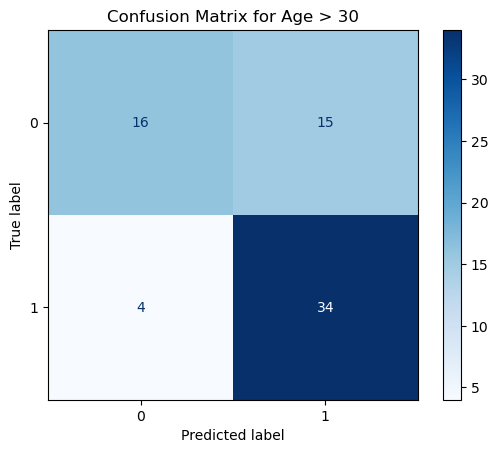

In [52]:


# Compute the confusion matrix
cm_above = confusion_matrix(Y_test_above, Y_predict_above)

# Create the display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm_above)

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Age > 30")
plt.show()


In [53]:
# Unpack confusion matrix correctly
TN_above, FP_above, FN_above, TP_above = cm_above.ravel()

# Calculate metrics
calculated_accuracy_above = (TP_above + TN_above) / (TP_above + TN_above + FP_above + FN_above)
calculated_precision_above = TP_above / (TP_above + FP_above)
calculated_recall_above = TP_above / (TP_above + FN_above)
calculated_F1_above = 2 * ((calculated_precision_above * calculated_recall_above) / (calculated_precision_above + calculated_recall_above))

# Print results
print(f"Above 30 Accuracy: {calculated_accuracy_above * 100:.2f}%")
print(f"Above 30 Precision: {calculated_precision_above * 100:.2f}%")
print(f"Above 30 Recall: {calculated_recall_above * 100:.2f}%")
print(f"Above 30 F1 Score: {calculated_F1_above * 100:.2f}%")


Above 30 Accuracy: 72.46%
Above 30 Precision: 69.39%
Above 30 Recall: 89.47%
Above 30 F1 Score: 78.16%


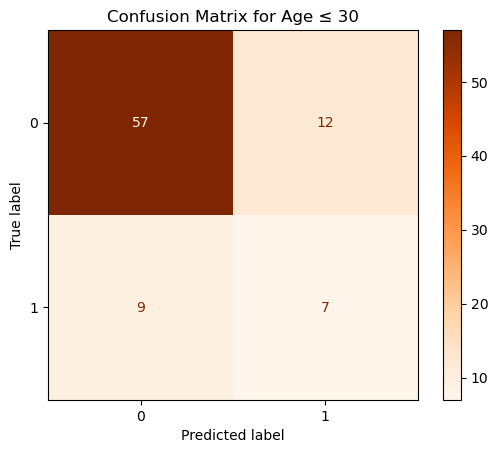

In [54]:
cm_below = confusion_matrix(Y_test_below, Y_predict_below)
disp_below = ConfusionMatrixDisplay(confusion_matrix=cm_below)
disp_below.plot(cmap='Oranges')
plt.title("Confusion Matrix for Age ≤ 30")
plt.show()


In [55]:
# Unpack confusion matrix for below 30 group
TN_below, FP_below, FN_below, TP_below = cm_below.ravel()

# Calculate metrics
calculated_accuracy_below = (TP_below + TN_below) / (TP_below + TN_below + FP_below + FN_below)
calculated_precision_below = TP_below / (TP_below + FP_below)
calculated_recall_below = TP_below / (TP_below + FN_below)
calculated_F1_below = 2 * ((calculated_precision_below * calculated_recall_below) / (calculated_precision_below + calculated_recall_below))

# Print results
print(f"Below 30 Accuracy: {calculated_accuracy_below * 100:.2f}%")
print(f"Below 30 Precision: {calculated_precision_below * 100:.2f}%")
print(f"Below 30 Recall: {calculated_recall_below * 100:.2f}%")
print(f"Below 30 F1 Score: {calculated_F1_below * 100:.2f}%")


Below 30 Accuracy: 75.29%
Below 30 Precision: 36.84%
Below 30 Recall: 43.75%
Below 30 F1 Score: 40.00%


In [56]:
model = SVC(probability=True, kernel='rbf', random_state=42)
model.fit(X_train_scaled, y_train)


SVC(probability=True, random_state=42)

In [57]:
# Initialize the LIME explainer for the classification problem
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,               # Training data (features as numpy array)
    feature_names=X.columns,                    # Feature names to label the explanation
    class_names=list(y.unique()),               # Class names (unique values from the target variable)
    mode="classification"                       # Mode set to classification
)

# Pick a single instance from X_test to explain (e.g., the 90th instance)
instance_to_explain = X_test.iloc[90].values

# Generate explanation for the instance using the model's predicted probabilities
lime_explanation = explainer.explain_instance(
    instance_to_explain,                        # Data point to explain
    model.predict_proba                         # Use model's predict_proba for classification
)

# Display the explanation in the notebook
lime_explanation.show_in_notebook()



  0%|          | 0/154 [00:00<?, ?it/s]

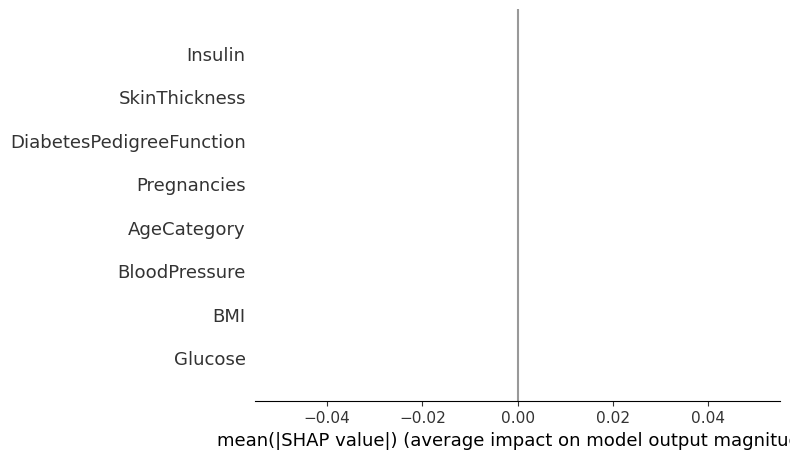

In [59]:
# Create a SHAP KernelExplainer with a subset of X_train for background data (using KMeans to reduce size)
background_data = shap.kmeans(X_train, 100)  # Reduce background data to 100 samples using KMeans

# Create SHAP explainer
explainer2 = shap.KernelExplainer(model.predict, background_data)

# Calculate SHAP values for the test set
shap_values2 = explainer2.shap_values(X_test)

# Generate a SHAP summary plot for the test set (Bar Plot)
shap.summary_plot(shap_values2, X_test, plot_type="bar")
